# Predict Bike Sharing Demand with AutoGluon Template

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/udacity/project-1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/udacity/project-1


## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
...
2. Scroll down to API and click Create New API Token.
...
3. Open up `kaggle.json` and use the username and key.
...

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "vietvo89"
kaggle_key = "1dab0dd5b34bbdc73f954098fd4ac703"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
...

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train_file = 'train.csv'
train = pd.read_csv(train_file,parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test_file = 'test.csv'
test = pd.read_csv(test_file,parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission_file='sampleSubmission.csv'
submission = pd.read_csv(submission_file,parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Show information about datatype
print('train set info:\n')
train.info()
print('\ntest set info:\n')
test.info()

train set info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB

test set info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Co

In [ ]:
# Check for null values
print('train set:\n',train.isnull().sum())

print('\ntest set:\n', test.isnull().sum())


train set:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

test set:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [ ]:
# Explore features in train and test sets
print("Number of columns of train set: ", train.shape[1])
print("\nColumns in Train Dataset:\n", train.columns)

print("\nNumber of columns of test set: ", test.shape[1])
print("\nColumns in Test Dataset:\n", test.columns)

# Features not present in test set
print("\nColumns in train set but not in test set: ")
list(set(train.columns).difference(set(test.columns)))

Number of columns of train set:  12

Columns in Train Dataset:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Number of columns of test set:  9

Columns in Test Dataset:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

Columns in train set but not in test set: 


['registered', 'casual', 'count']

### Summary:
1. No missing data (no Null data)
2. The number of features of train and test set are different.

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
#predictor = TabularPredictor(label="count").fit(
#    train_data=train, time_limit=600, presets="best_quality"
#)

# predictor = TabularPredictor(
#     label="count", problem_type="regression", eval_metric="root_mean_squared_error" #"mean_absolute_error"
# ).fit(
#     train_data=train.drop(['casual', 'registered'], axis=1),
#     time_limit=600,
#     presets="best_quality",
# )

# 1. Define parameters
label="count"
problem_type= "regression"
eval_metric="root_mean_squared_error"
time_limit=600
presets="best_quality"
ignored_columns = ["casual", "registered"]

# 2. Train model
predictor = TabularPredictor(label=label,
                             problem_type= problem_type, 
                             eval_metric=eval_metric,
                             learner_kwargs={"ignored_columns": ignored_columns}
                             ).fit(train_data=train,
                                   time_limit=time_limit, 
                                   presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_010020/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_010020/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11960.8 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the feature

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
# initial training without adding new features
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.081576      38.663403  530.232563                0.001179           0.721266            3       True         12
1   RandomForestMSE_BAG_L2  -53.441594      30.477467  408.487010                0.668466          48.169591            2       True         11
2          LightGBM_BAG_L2  -54.968688      30.301963  403.199022                0.492963          42.881603            2       True         10
3        LightGBMXT_BAG_L2  -60.191088      37.500795  438.460103                7.691795          78.142685            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.044560    0.035262                0.044560           0.035262            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.045714    0.813576         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.85656774260377,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

In [ ]:
# Store and Show Leaderboard
leaderboard = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard.head()

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.081576,38.663403,530.232563,0.001179,0.721266,3,True,12
1,RandomForestMSE_BAG_L2,-53.441594,30.477467,408.487010,0.668466,48.169591,2,True,11
2,LightGBM_BAG_L2,-54.968688,30.301963,403.199022,0.492963,42.881603,2,True,10
3,LightGBMXT_BAG_L2,-60.191088,37.500795,438.460103,7.691795,78.142685,2,True,9
4,KNeighborsDist_BAG_L1,-84.125061,0.044560,0.035262,0.044560,0.035262,1,True,2


### Create predictions from test dataset

In [ ]:
# Do prediction for test dataset
predictions = predictor.predict(test)
predictions.head()

0    23.455727
1    42.291832
2    45.969070
3    49.131020
4    51.987556
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
#?
predictions.describe()

count    6493.000000
mean      100.456985
std        89.976555
min         2.797862
25%        19.664316
50%        64.193695
75%       167.806763
max       368.975525
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
neg_pred_cnt = len(predictions[predictions<0])
print('number of negative values:{}'.format(neg_pred_cnt))
if neg_pred_cnt >0:
  print('List of negative values:\n',predictions[predictions<0])

number of negative values:0


In [ ]:
# Set them to zero if negative values exist
predictions[predictions<0] = 0
print('Check number of negative values:{}'.format(len(predictions[predictions<0])))

Check number of negative values:0


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 1.00MB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2023-05-31 01:20:22  first raw submission                 complete  1.80802      1.80802       
submission_new_hpo.csv       2023-05-30 14:29:08  new features with hyperparameters 3  complete  0.47600      0.47600       
submission_new_hpo.csv       2023-05-30 14:17:22  new features with hyperparameters 2  complete  0.47600      0.47600       
submission_new_hpo.csv       2023-05-30 13:47:49  new features with hyperparameters    complete  0.47583      0.47583       


#### Initial score = 1.85

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

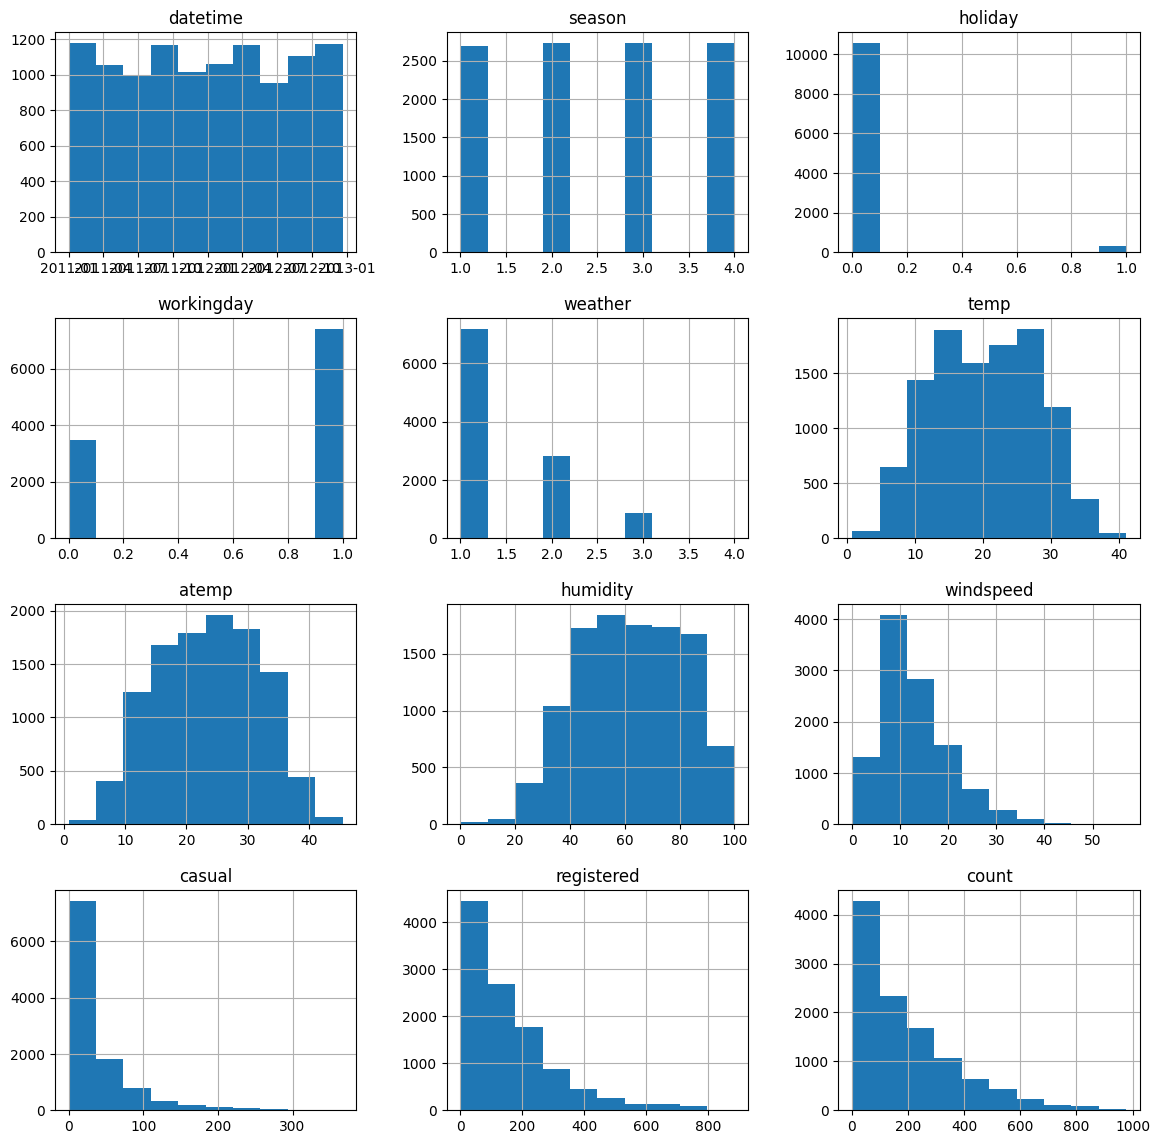

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt

train.hist(figsize=(14,14))
#plt.tight_layout()
plt.show()

In [ ]:
# Verify 'datetime' feature dataset
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [ ]:
# create a new feature for trainset = separate out the datetime into hour, day, or month parts.
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.dayofweek   # dayofweek: 0=>Mon, 1=>Tue, ...
train['hour'] = train['datetime'].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature since it is unnecessary and duplicated
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [ ]:
# create a new feature for testset = separate out the datetime into hour, day, or month parts.
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.dayofweek  # dayofweek: 0=>Mon, 1=>Tue, ...
test['hour'] = test['datetime'].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature since it is unnecessary and duplicated
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
# convert from int to category types 
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [ ]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


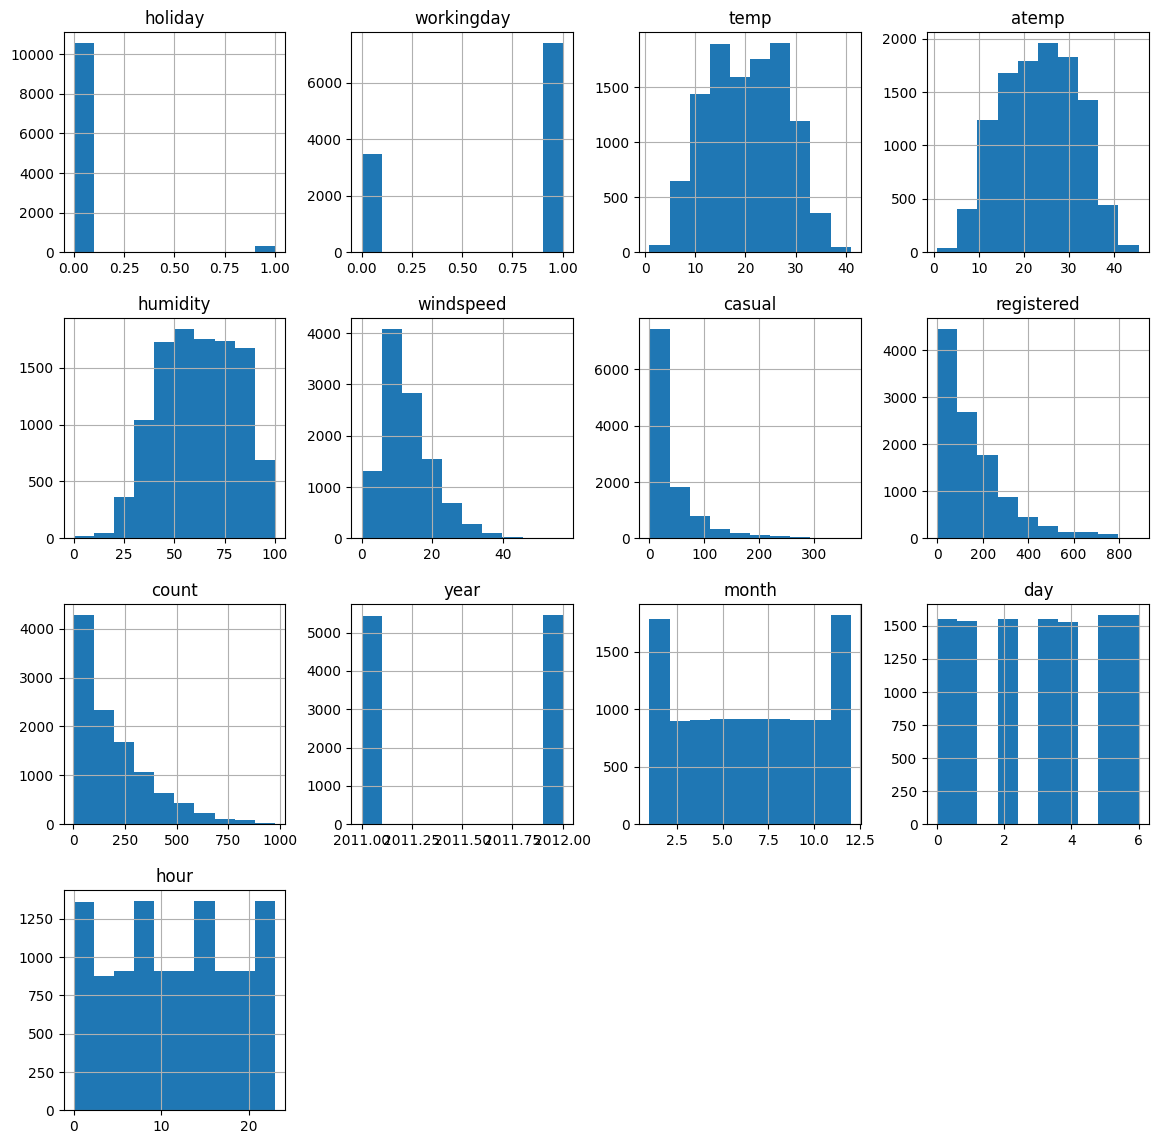

In [ ]:
# View histogram of all features again now with the year, month, day and hour feature
train.hist(figsize=(14,14))  
#plt.tight_layout()
plt.show()

### Summary about the exploration about the correlation between features and "count"

- Using a heatmap to understand the correlation between count and features and explore their pattern.
- Based on the correlation matrix, "casual" and "registered" two ignored features have high correlation with "count", "temp" and "atemp" are the next features have moderate correlation while the rest is almost not correlated with "count".

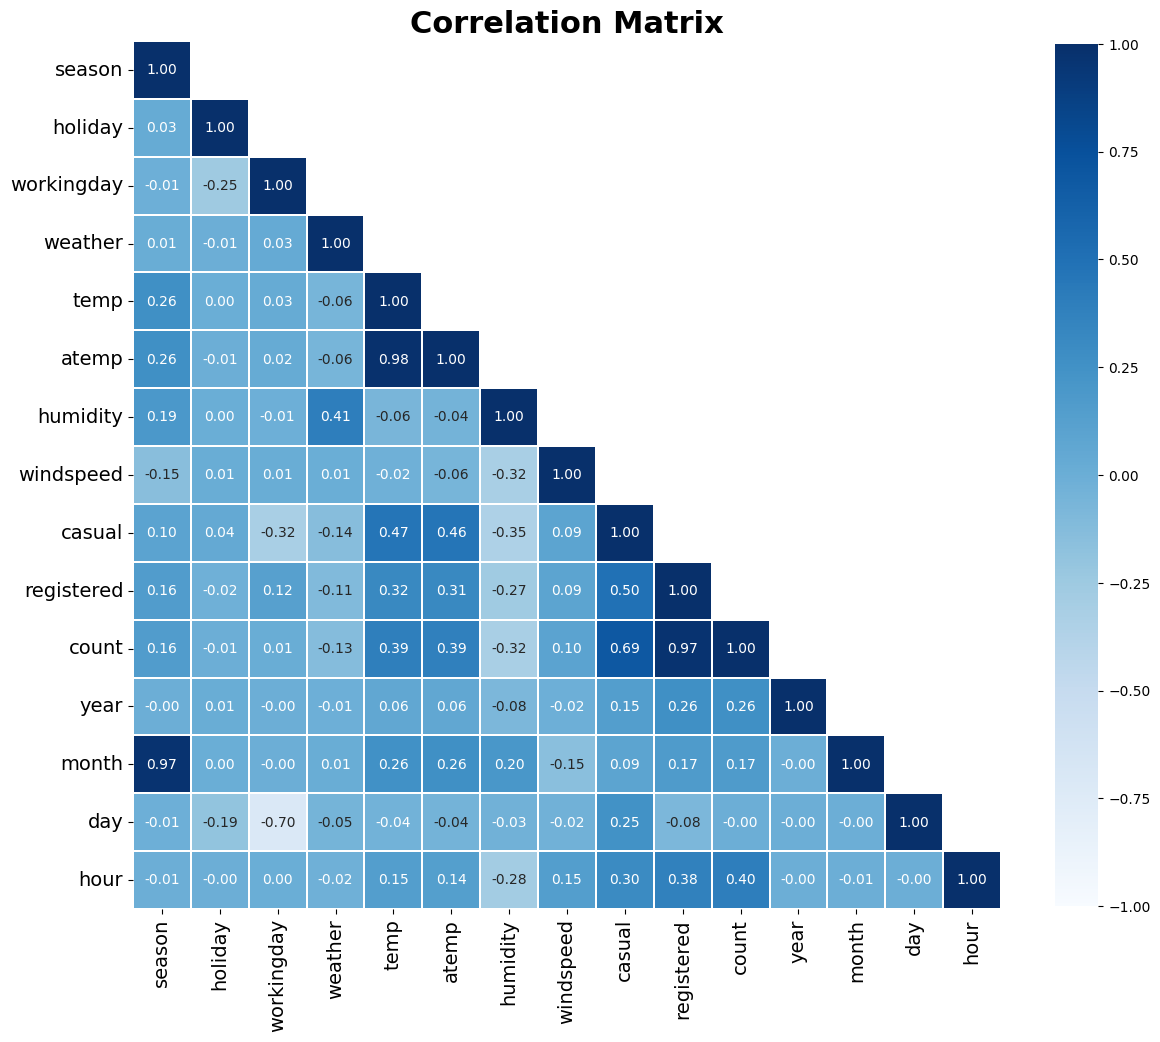

In [ ]:
import numpy as np
import seaborn as sns

data = train.copy()
data["season"] = data["season"].astype(int)
data["weather"] = data["weather"].astype(int)

corr = data.corr()
fig, ax = plt.subplots(figsize=(14, 14))

# Create a mask to eliminate redundant repetitive correlations
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

# Plot heatmap using correlation matrix and mask
ax = sns.heatmap(corr, cmap= 'Blues', cbar_kws={"shrink": .8}, vmin= -1, vmax=1, center=0,
            square=True, mask=mask, annot=True, linewidths=0.01, fmt=".2f", 
            annot_kws={"size":10})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("Correlation Matrix", fontsize=22, fontweight='bold')
#plt.tight_layout()
plt.autoscale()
plt.show()

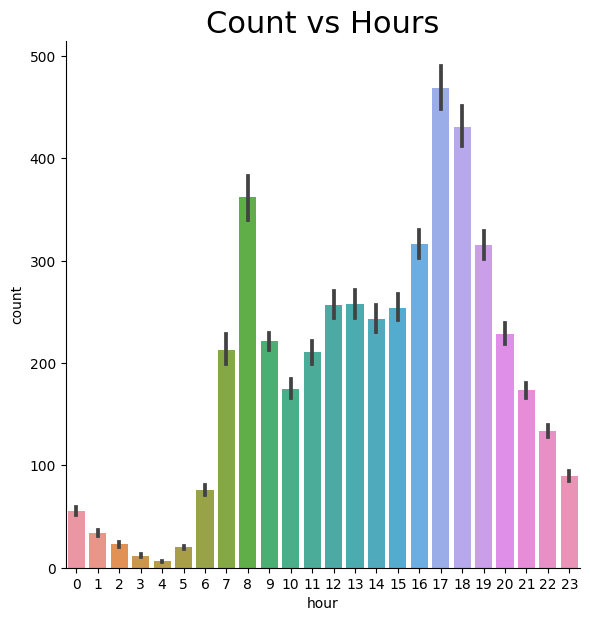

In [ ]:
sns.catplot(x="hour",y="count",data=train,kind='bar',height=6,aspect=1) 
#sns.barplot(x="hour",y="count",data=train) 
#plt.tight_layout()
plt.title("Count vs Hours", fontsize=22)
plt.show()

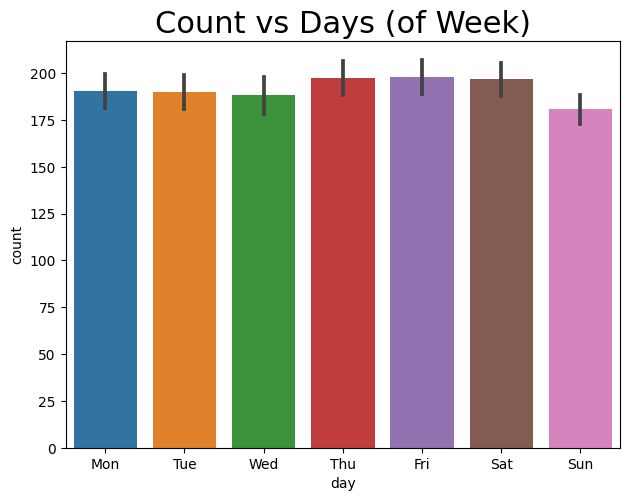

In [ ]:
#sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5) 
sns.barplot(x="day",y="count",data=train) 
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Mon", "Tue", "Wed", 
                                     "Thu", "Fri", "Sat", "Sun"])
plt.title("Count vs Days (of Week)", fontsize=22)
plt.show()

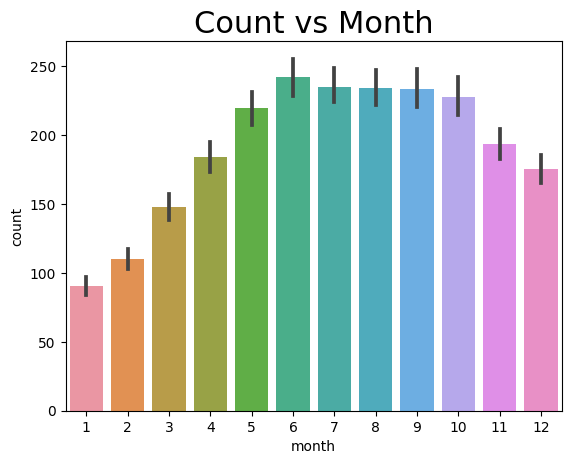

In [ ]:
#sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5) 
#sns.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
sns.barplot(x="month",y="count",data=train) 
plt.title("Count vs Month", fontsize=22)
#plt.tight_layout()
plt.show()

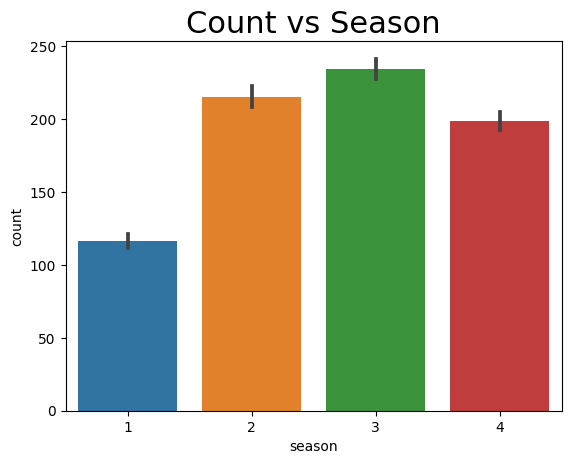

In [ ]:
sns.barplot(x="season",y="count",data=train)
plt.title("Count vs Season", fontsize=22)
#plt.tight_layout()
plt.show()

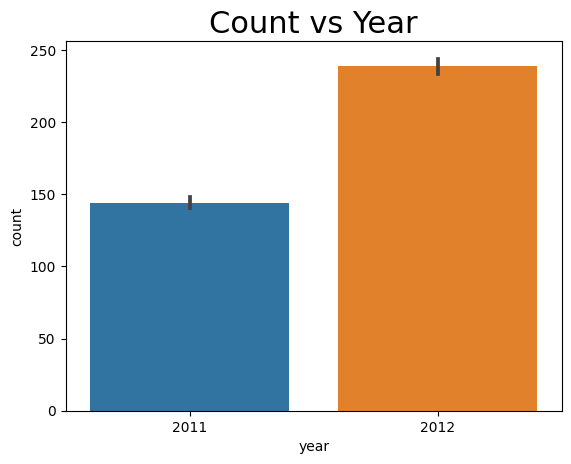

In [ ]:
#sns.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)
sns.barplot(x="year",y="count",data=train)
plt.title("Count vs Year", fontsize=22)
#plt.tight_layout()
plt.show()

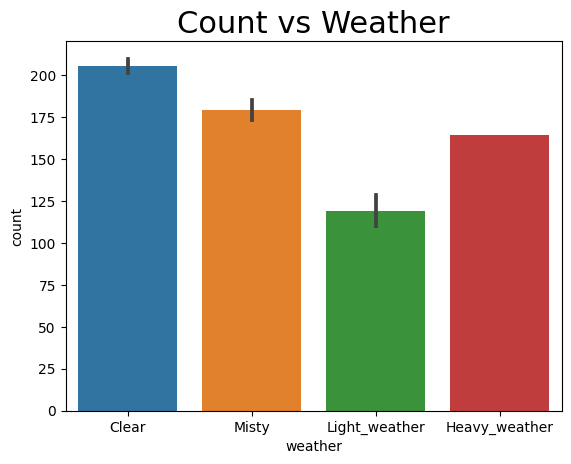

In [ ]:
#sns.catplot(x="weather",y="count",data=train,kind='bar',height=5,aspect=1.5) 
sns.barplot(x="weather",y="count",data=train) 
plt.xticks(ticks=range(0,4), labels=["Clear","Misty","Light_weather","Heavy_weather"])
                                     #"Light_\nRain/Snow\n/Thunderstorm", 
                                     #"Heavy_\nRain/Snow\n/Thunderstorm"])
#plt.tight_layout()
plt.title("Count vs Weather", fontsize=22)
plt.show()

## Step 5a: Rerun the model with the same settings as before, just with more features "year, month, day, hours"

In [ ]:
# 1. Define parameters
label="count"
problem_type= "regression"
eval_metric="root_mean_squared_error"
time_limit=600
presets="best_quality"
ignored_columns = ["casual", "registered"]

# 2. Train model
predictor_new_features = TabularPredictor(label=label,
                             problem_type= problem_type, 
                             eval_metric=eval_metric,
                             learner_kwargs={"ignored_columns": ignored_columns}
                             ).fit(train_data=train,
                                   time_limit=time_limit, 
                                   presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_012937/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_012937/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10797.03 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.112574      55.085755  567.214000                0.001450           0.516477            3       True         13
1      WeightedEnsemble_L2  -34.305759      51.841889  386.247162                0.001387           0.662131            2       True          8
2          CatBoost_BAG_L2  -34.332669      52.633832  452.066048                0.519197          66.420700            2       True         12
3          LightGBM_BAG_L2  -34.623865      52.334743  420.599185                0.220109          34.953836            2       True         10
4   RandomForestMSE_BAG_L2  -34.778044      53.126926  430.100120                1.012292          44.454771            2       True         11
5        LightGBMXT_BAG_L2  -35.075840      53.332708  420.868216         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.45988391821316,
  'LightGBM_BAG_L1': -35.79686905713535,
  'RandomForestMSE_BAG_L1': -39.587440921643605,
  'CatBoost_BAG_L1': -37.77149658784547,
  'ExtraTree

In [ ]:
leaderboard_new_feature = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
leaderboard_new_feature.head()

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-34.112574,55.085755,567.214000,0.001450,0.516477,3,True,13
1,WeightedEnsemble_L2,-34.305759,51.841889,386.247162,0.001387,0.662131,2,True,8
2,CatBoost_BAG_L2,-34.332669,52.633832,452.066048,0.519197,66.420700,2,True,12
3,LightGBM_BAG_L2,-34.623865,52.334743,420.599185,0.220109,34.953836,2,True,10
4,RandomForestMSE_BAG_L2,-34.778044,53.126926,430.100120,1.012292,44.454771,2,True,11


In [ ]:
# Remember to set all negative values to zero
new_predictions = predictor_new_features.predict(test)
new_predictions[new_predictions<0] = 0

In [ ]:
# Same submitting predictions
# submission_new_features["count"] = ?
# submission_new_features.to_csv("submission_new_features.csv", index=False)
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 855kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-31 01:41:26  new features                         pending                              
submission.csv               2023-05-31 01:20:22  first raw submission                 complete  1.80802      1.80802       
submission_new_hpo.csv       2023-05-30 14:29:08  new features with hyperparameters 3  complete  0.47600      0.47600       
submission_new_hpo.csv       2023-05-30 14:17:22  new features with hyperparameters 2  complete  0.47600      0.47600       


#### New Score =  0.47

## Step 5b: Rerun the model with the same settings as before, just with adding new features "peak_hour"

In [ ]:
train["peak_hour"] = 0 # mean no peak hour
train.loc[((7<=train["hour"]) & (train["hour"]<=9) | (11<=train["hour"]) & (train["hour"]<=13) | (17<=train["hour"]) & (train["hour"]<=18)),"peak_hour"] = 1 # mean peak hour
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,peak_hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,0


In [ ]:
test["peak_hour"] = 0 # mean no peak hour
test.loc[((7<=test["hour"]) & (test["hour"]<=9) | (11<=test["hour"]) & (test["hour"]<=13) | (17<=test["hour"]) & (test["hour"]<=18)),"peak_hour"] = 1 # mean peak hour
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,peak_hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4,0


In [ ]:
# convert from int to category types 
train["peak_hour"] = train["peak_hour"].astype("category")
test["peak_hour"] = test["peak_hour"].astype("category")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int64   
 12  month       10886 non-null  int64   
 13  day         10886 non-null  int64   
 14  hour        10886 non-null  int64   
 15  peak_hour   10886 non-null  category
dtypes: category(3), float64(3), int64(10)
memory usage: 1.1 MB


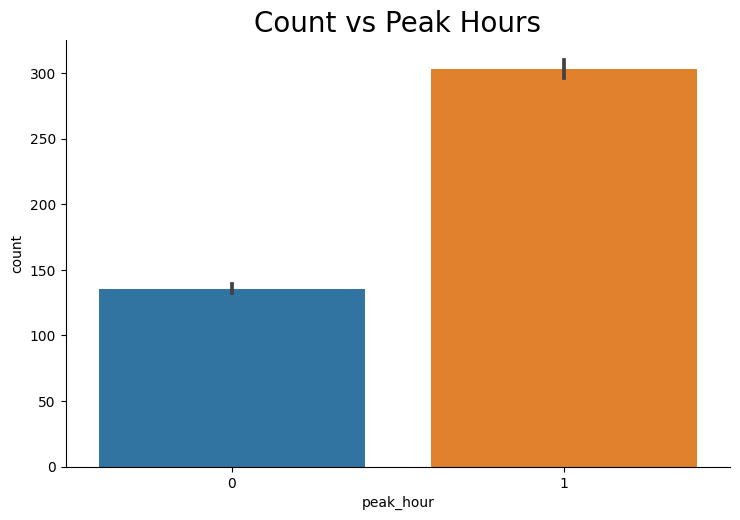

In [ ]:
sns.catplot(x="peak_hour",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.title("Count vs Peak Hours", fontsize=20)
plt.show()

In [ ]:
# 1. Define parameters
label="count"
problem_type= "regression"
eval_metric="root_mean_squared_error"
time_limit=600
presets="best_quality"
ignored_columns = ["casual", "registered"]

# 2. Train model
predictor_new_features_2 = TabularPredictor(label=label,
                             problem_type= problem_type, 
                             eval_metric=eval_metric,
                             learner_kwargs={"ignored_columns": ignored_columns}
                             ).fit(train_data=train,
                                   time_limit=time_limit, 
                                   presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_022257/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_022257/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10479.07 MB
	Train Data (Original)  Memory Usage: 0.9 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the feature

In [ ]:
predictor_new_features_2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -34.368132      21.455763  370.273625                0.001463           0.660185            2       True          8
1      WeightedEnsemble_L3  -34.667303      25.160564  556.885957                0.001195           0.438346            3       True         13
2          CatBoost_BAG_L2  -34.815244      23.019539  440.572731                0.314701          63.542663            2       True         12
3          LightGBM_BAG_L2  -35.260422      23.154874  412.544518                0.450036          35.514450            2       True         10
4   RandomForestMSE_BAG_L2  -35.440304      23.734452  420.650531                1.029614          43.620463            2       True         11
5        LightGBMXT_BAG_L2  -35.651027      23.365018  413.770036         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.67708928229776,
  'LightGBM_BAG_L1': -35.81181697063099,
  'RandomForestMSE_BAG_L1': -39.950526617303346,
  'CatBoost_BAG_L1': -36.2158097930651,
  'ExtraTrees

In [ ]:
# Store and Show Leaderboard
leaderboard_new_feature_2 = pd.DataFrame(predictor_new_features_2.leaderboard(silent=True))
leaderboard_new_feature_2.head()

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-34.368132,21.455763,370.273625,0.001463,0.660185,2,True,8
1,WeightedEnsemble_L3,-34.667303,25.160564,556.885957,0.001195,0.438346,3,True,13
2,CatBoost_BAG_L2,-34.815244,23.019539,440.572731,0.314701,63.542663,2,True,12
3,LightGBM_BAG_L2,-35.260422,23.154874,412.544518,0.450036,35.514450,2,True,10
4,RandomForestMSE_BAG_L2,-35.440304,23.734452,420.650531,1.029614,43.620463,2,True,11


In [ ]:
# Remember to set all negative values to zero
new_predictions_2 = predictor_new_features_2.predict(test)
new_predictions_2[new_predictions_2<0] = 0

In [ ]:
# Same submitting predictions
# submission_new_features["count"] = ?
# submission_new_features.to_csv("submission_new_features.csv", index=False)
submission_new_features_2 = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features_2["count"] = new_predictions_2
submission_new_features_2.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features 2"

100% 188k/188k [00:00<00:00, 791kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-31 02:34:11  new features 2                       pending                              
submission_new_features.csv  2023-05-31 01:41:26  new features                         complete  0.44869      0.44869       
submission.csv               2023-05-31 01:20:22  first raw submission                 complete  1.80802      1.80802       
submission_new_hpo.csv       2023-05-30 14:29:08  new features with hyperparameters 3  complete  0.47600      0.47600       


#### New Score =  0.47

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
#predictor_new_hpo = TabularPredictor(?).fit(?)
import autogluon.core as ag

# 1. NN option setup
nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    
    'layers': ag.space.Categorical([100], [500], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

# 2. GBM option setup
gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {#'extra_trees': True,   # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                   #'NN_TORCH': nn_options, 
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

# 3. Hyperparameters setup
num_trials = 10  # try at most 10 different hyperparameter configurations for each type of model
scheduler = 'local'       # Local FIFO scheduler
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

# 4. Define model parameter
label="count"
problem_type= "regression"
eval_metric="root_mean_squared_error"
time_limit=600
presets="best_quality"

# 5. Train model
predictor_new_hpo = TabularPredictor(label=label,
                             problem_type= problem_type, 
                             eval_metric=eval_metric,
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}
                             ).fit(train_data=train,
                                   time_limit=time_limit, 
                                   presets=presets,
                                   hyperparameters=hyperparameters, 
                                   hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                   refit_full='best')
                             

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_024111/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_024111/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10421.16 MB
	Train Data (Original)  Memory Usage: 0.9 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the feature

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-42.654	 = Validation score   (-root_mean_squared_error)
	37.23s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-41.133	 = Validation score   (-root_mean_squared_error)
	36.48s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-40.4518	 = Validation score   (-root_mean_squared_error)
	34.89s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-121.3623	 = Validation score   (-root_mean_squared_error)
	39.9s	 = Training   runtime
	0.0s	 = Validation runtime
Hyp

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=34074, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-39.4343	 = Validation score   (-root_mean_squared_error)
	34.26s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-39.1509	 = Validation score   (-root_mean_squared_error)
	38.7s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-39.2337	 = Validation score   (-root_mean_squared_error)
	35.15s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-103.443	 = Validation score   (-root_mean_squared_error)
	44.78s	 = Training   runtime
	0.0s	 = Validation runtime
Hy

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=36975, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -38.973444       0.003641  223.251715                0.002645           0.892756            3       True         10
1         LightGBM_BAG_L2/T2  -39.150894       0.000845  187.206102                0.000159          38.700697            2       True          7
2         LightGBM_BAG_L2/T3  -39.233665       0.000837  183.658262                0.000151          35.152857            2       True          8
3         LightGBM_BAG_L2/T1  -39.434272       0.000859  182.760607                0.000173          34.255202            2       True          6
4        WeightedEnsemble_L2  -40.042753       0.001864   72.664488                0.001536           1.289625            2       True          5
5         LightGBM_BAG_L1/T3  -40.451832       0.000153   34.8

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L1/T1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3_FULL': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3_FULL': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -42.653984480260725,
  'Li

In [ ]:
# Remember to set all negative values to zero
new_predictions_hpo = predictor_new_hpo.predict(test)
new_predictions_hpo[new_predictions_hpo<0] = 0

In [ ]:
# Leaderboard dataframe
leaderboard_new_hpo = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo.head()

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-38.973444,0.003641,223.251715,0.002645,0.892756,3,True,10
1,LightGBM_BAG_L2/T2,-39.150894,0.000845,187.206102,0.000159,38.700697,2,True,7
2,LightGBM_BAG_L2/T3,-39.233665,0.000837,183.658262,0.000151,35.152857,2,True,8
3,LightGBM_BAG_L2/T1,-39.434272,0.000859,182.760607,0.000173,34.255202,2,True,6
4,WeightedEnsemble_L2,-40.042753,0.001864,72.664488,0.001536,1.289625,2,True,5


In [ ]:
# Same submitting predictions
#submission_new_hpo["count"] = ?
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 902kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-31 02:49:46  new features with hyperparameters    complete  0.48679      0.48679       
submission_new_features.csv  2023-05-31 02:34:11  new features 2                       complete  0.52733      0.52733       
submission_new_features.csv  2023-05-31 01:41:26  new features                         complete  0.44869      0.44869       
submission.csv               2023-05-31 01:20:22  first raw submission                 complete  1.80802      1.80802       


#### New Score = 0.476

#### Finetune Hyperparameters 2nd time

In [ ]:
#predictor_new_hpo = TabularPredictor(?).fit(?)
import autogluon.core as ag

# 1. NN option setup
nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    
    'layers': ag.space.Categorical([100], [500], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

# 2a. GBM option setup
gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds 
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees 
}

# 2b. XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# 2c. XGB Models
xgb_options = [{'objective': 'reg:squarederror',
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  

# 3. Hyperparameters setup
num_trials = 20  # try at most 20 different hyperparameter configurations for each type of model
scheduler = 'local'       # Local FIFO scheduler
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

# 4. Define model parameter
label="count"
problem_type= "regression"
eval_metric="root_mean_squared_error"
time_limit=600
presets="best_quality"
ignored_columns = ["casual", "registered"]

# 5. Train model
predictor_new_hpo_2 = TabularPredictor(label=label,
                             problem_type= problem_type, 
                             eval_metric=eval_metric,
                             learner_kwargs={"ignored_columns": ignored_columns}
                             ).fit(train_data=train,
                                   time_limit=time_limit, 
                                   presets=presets,
                                   hyperparameters=hyperparameters, 
                                   hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                   refit_full='best')
                             

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_035631/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_035631/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10775.26 MB
	Train Data (Original)  Memory Usage: 0.9 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the feature

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-42.654	 = Validation score   (-root_mean_squared_error)
	41.13s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-41.133	 = Validation score   (-root_mean_squared_error)
	40.17s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 89.94s of the 518.23s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-39.6992	 = Validation score   (-root_mean_squared_error)
	13.53s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-40.0871	 = Validation score   (-root_mean_squared_error)
	37.07s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-38.6556	 = Validation score   (-root_mean_squared_error)
	42.14s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ... Tuning model for up to 89.94s of the 425.2s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=56169, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-37.5072	 = Validation score   (-root_mean_squared_error)
	56.08s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 77.33s of the 287.37s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	-37.3151	 = Validation score   (-root_mean_squared_error)
	20.12s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 77.33s of the 267.16s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-37.9844	 = Validation score   (-root_mean_squared_error)
	31.73s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-38.0369	 = Validation score   (-root_mean_squared_error)
	57.16s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ... Tuning model for up to 77.33s of the 178.06s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=58631, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

In [ ]:
predictor_new_hpo_2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3 -37.114959       0.004209  282.989156                0.001390           1.009207            3       True         11
1        ExtraTreesMSE_BAG_L2 -37.315114       0.002462  194.166146                0.000345          20.122351            2       True          8
2         WeightedEnsemble_L2 -37.356057       0.001841   96.555353                0.001154           0.713139            2       True          6
3          LightGBM_BAG_L2/T1 -37.507246       0.002337  230.128618                0.000219          56.084823            2       True          7
4           XGBoost_BAG_L2/T1 -37.984368       0.002255  205.772775                0.000138          31.728980            2       True          9
5           XGBoost_BAG_L2/T2 -38.036932       0.002346  231.2

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L1/T1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2_FULL': 'StackerEnsembleModel_LGB',
  'ExtraTreesMSE_BAG_L1_FULL': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1_FULL': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2_FULL': 'StackerEnsembleModel_XGBoost',
  'LightGBM_BAG_L2/T1_FULL': 'StackerEnsembleModel_LGB',
  'ExtraTreesMSE_BAG_L2_FULL': 'StackerEnsembleModel_X

In [ ]:
# Remember to set all negative values to zero
new_predictions_hpo_2 = predictor_new_hpo_2.predict(test)
new_predictions_hpo_2[new_predictions_hpo_2<0] = 0

In [ ]:
# Leaderboard dataframe
leaderboard_new_hpo_2 = pd.DataFrame(predictor_new_hpo_2.leaderboard(silent=True))
leaderboard_new_hpo_2.head()

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-37.114959,0.004209,282.989156,0.001390,1.009207,3,True,11
1,ExtraTreesMSE_BAG_L2,-37.315114,0.002462,194.166146,0.000345,20.122351,2,True,8
2,WeightedEnsemble_L2,-37.356057,0.001841,96.555353,0.001154,0.713139,2,True,6
3,LightGBM_BAG_L2/T1,-37.507246,0.002337,230.128618,0.000219,56.084823,2,True,7
4,XGBoost_BAG_L2/T1,-37.984368,0.002255,205.772775,0.000138,31.728980,2,True,9


In [ ]:
# Same submitting predictions
#submission_new_hpo["count"] = ?
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo_2
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters 2"

100% 188k/188k [00:00<00:00, 816kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-31 04:05:22  new features with hyperparameters 2  complete  0.43857      0.43857       
submission_new_hpo.csv       2023-05-31 02:49:46  new features with hyperparameters    complete  0.48679      0.48679       
submission_new_features.csv  2023-05-31 02:34:11  new features 2                       complete  0.52733      0.52733       
submission_new_features.csv  2023-05-31 01:41:26  new features                         complete  0.44869      0.44869       


#### New Score of `?`

#### Finetune Hyperparameters 3rd time

In [ ]:
#predictor_new_hpo = TabularPredictor(?).fit(?)
import autogluon.core as ag

# 1. NN option setup
nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    
    'layers': ag.space.Categorical([100], [500], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

# 2a. GBM option setup
gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# XGB Models
xgb_options = [{'objective': 'reg:squarederror', 
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

# Random Forest Models
rf_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# KNN
knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}}, 
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]  # default

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'KNN': knn_options,
                   'XT': xt_options,
                   'XGB': xgb_options,
                   'RF': rf_options,
                   'NN': nn_options,  
                  }  

# 3. Hyperparameters setup
num_trials = 30  # try at most 30 different hyperparameter configurations for each type of model
scheduler = 'local'       # Local FIFO scheduler
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

# 4. Define model parameter
label="count"
problem_type= "regression"
eval_metric="root_mean_squared_error"
time_limit=600
presets="best_quality"
ignored_columns = ["casual", "registered"]

# 5. Train model
predictor_new_hpo_3 = TabularPredictor(label=label,
                             problem_type= problem_type, 
                             eval_metric=eval_metric,
                             learner_kwargs={"ignored_columns": ignored_columns}
                             ).fit(train_data=train,
                                   time_limit=time_limit, 
                                   presets=presets,
                                   hyperparameters=hyperparameters, 
                                   hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                   refit_full='best')
                             

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_040704/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_040704/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10632.62 MB
	Train Data (Original)  Memory Usage: 0.9 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the feature

  0%|          | 0/30 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-42.654	 = Validation score   (-root_mean_squared_error)
	36.72s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 51.4s of the 562.08s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L1 ...
	-39.9505	 = Validation score   (-root_mean_squared_error)
	20.41s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 51.4s of the 541.57s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-3

  0%|          | 0/30 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-40.0871	 = Validation score   (-root_mean_squared_error)
	53.55s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ... Tuning model for up to 51.4s of the 460.64s of remaining time.


  0%|          | 0/30 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=61103, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

  0%|          | 0/30 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-37.9264	 = Validation score   (-root_mean_squared_error)
	41.01s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 74.69s of the 373.61s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L2 ...
	-38.5399	 = Validation score   (-root_mean_squared_error)
	43.77s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 74.69s of the 329.76s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...


  0%|          | 0/30 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-38.5596	 = Validation score   (-root_mean_squared_error)
	33.08s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-38.1901	 = Validation score   (-root_mean_squared_error)
	48.04s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ... Tuning model for up to 74.69s of the 231.31s of remaining time.


  0%|          | 0/30 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=63132, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

In [ ]:
predictor_new_hpo_3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                             model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              WeightedEnsemble_L3  -37.431409       0.009450  244.578730                0.001446           0.614680            3       True         13
1             ExtraTreesMSE_BAG_L2  -37.632203       0.006923  154.908515                0.000323          16.600354            2       True         10
2              WeightedEnsemble_L2  -37.697228       0.013002  102.150746                0.007008           1.277022            2       True          7
3               LightGBM_BAG_L2/T1  -37.926379       0.006786  179.319839                0.000185          41.011678            2       True          8
4                XGBoost_BAG_L2/T2  -38.190095       0.007496  186.352019                0.000895          48.043857            2       True         12
5           RandomForestMS

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUniform_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDistance_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'KNeighborsUniform_BAG_L1_FULL': 'StackerEnsembleModel_KNN',
  'KNeighborsDistance_BAG_L1_FULL': 'StackerEnsembleModel_KNN',
  'LightGBM_BAG_L1/T1_FULL': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1_FULL': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1_FULL': 'Stacker

In [ ]:
# Remember to set all negative values to zero
new_predictions_hpo_3 = predictor_new_hpo_3.predict(test)
new_predictions_hpo_3[new_predictions_hpo_3<0] = 0

In [ ]:
# Leaderboard dataframe
leaderboard_new_hpo_3 = pd.DataFrame(predictor_new_hpo_3.leaderboard(silent=True))
leaderboard_new_hpo_3.head()

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-37.431409,0.009450,244.578730,0.001446,0.614680,3,True,13
1,ExtraTreesMSE_BAG_L2,-37.632203,0.006923,154.908515,0.000323,16.600354,2,True,10
2,WeightedEnsemble_L2,-37.697228,0.013002,102.150746,0.007008,1.277022,2,True,7
3,LightGBM_BAG_L2/T1,-37.926379,0.006786,179.319839,0.000185,41.011678,2,True,8
4,XGBoost_BAG_L2/T2,-38.190095,0.007496,186.352019,0.000895,48.043857,2,True,12


In [ ]:
# Same submitting predictions
#submission_new_hpo["count"] = ?
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo_3
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters 3"

100% 188k/188k [00:00<00:00, 877kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-31 04:14:47  new features with hyperparameters 3  complete  0.44118      0.44118       
submission_new_hpo.csv       2023-05-31 04:05:22  new features with hyperparameters 2  complete  0.43857      0.43857       
submission_new_hpo.csv       2023-05-31 02:49:46  new features with hyperparameters    complete  0.48679      0.48679       
submission_new_features.csv  2023-05-31 02:34:11  new features 2                       complete  0.52733      0.52733       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

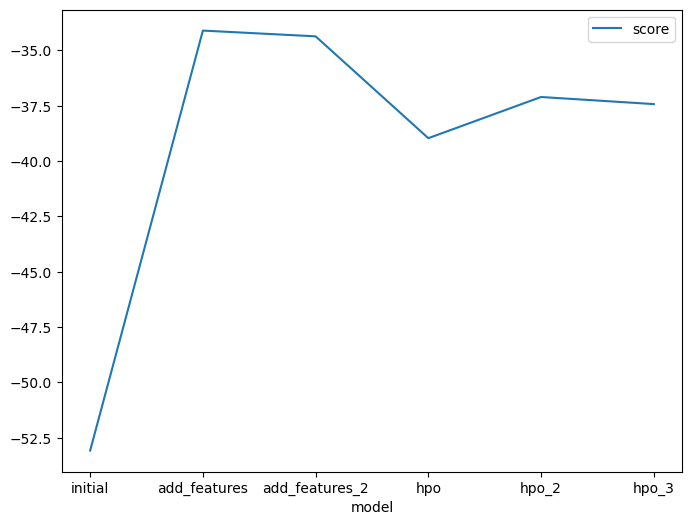

In [7]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "add_features_2", "hpo", "hpo_2", "hpo_3"],
        "score": [-53.08, -34.11, -34.37,-38.97,-37.11,-37.43]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

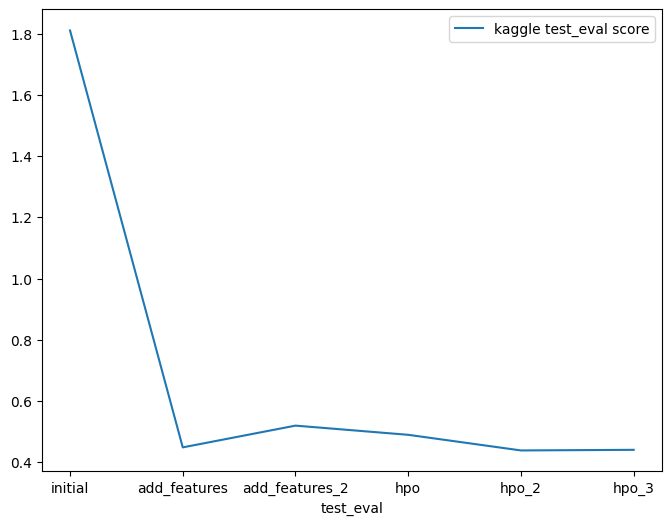

In [10]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "add_features_2", "hpo", "hpo_2", "hpo_3"],
        "kaggle test_eval score": [1.81, 0.449, 0.52, 0.49, 0.439, 0.441]
    }
).plot(x="test_eval", y="kaggle test_eval score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [17]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "add_features_2", "hpo", "hpo_2", "hpo_3"],
    "problem_type": ["regression","regression", "regression", "regression","regression","regression"],
    "eval_metric": ["root_mean_squared_error","root_mean_squared_error", "root_mean_squared_error","root_mean_squared_error","root_mean_squared_error","root_mean_squared_error"],
    "time_limit": [600, 600, 600, 600, 600,600],
    "presets": ["best_quality","best_quality","best_quality","best_quality","best_quality","best_quality"],
    "num_trials": ['None','None','None','10','20','30',],
    "scheduler": ['None','None','None','local','local','local'],
    "search_strategy": ['None','None','None','auto','auto','auto'],
    "hp-method": ["default" ,"default" ,"default" ,"GBM,NN" ,"GBM,XT,XGB,NN" ,"GBM,KNN,XT,XGB,RF,NN"],
    "score": [1.81, 0.449, 0.52, 0.49, 0.439, 0.441]
})

,model,problem_type,eval_metric,time_limit,presets,num_trials,scheduler,search_strategy,hp-method,score
0,initial,regression,root_mean_squared_error,600,best_quality,None,None,None,default,1.810
1,add_features,regression,root_mean_squared_error,600,best_quality,None,None,None,default,0.449
2,add_features_2,regression,root_mean_squared_error,600,best_quality,None,None,None,default,0.520
3,hpo,regression,root_mean_squared_error,600,best_quality,10,local,auto,"GBM,NN",0.490
4,hpo_2,regression,root_mean_squared_error,600,best_quality,20,local,auto,"GBM,XT,XGB,NN",0.439
5,hpo_3,regression,root_mean_squared_error,600,best_quality,30,local,auto,"GBM,KNN,XT,XGB,RF,NN",0.441


### Summary and Discussion:

This section discusses the impact of adding additional features and changing hyperparameters on the outcomes of the Kaggle score.

1. Adding additional features:
  - Additional features help improve the performance in general. For example,  "year, month, day, hour" helps improve the kaggle score from 1.8 to 0.449. 
  - However, beside new features about time, adding new features of "peak_hour" does not help improve. It could be this feature does not bring more useful information that may be already included in "year, month, day, hour".

2. Changing hyperparameters (auto finetuning):
  - In general, changing hyperparameters for specific models such as "GBM,XT,XGB,NN" help improve the kaggle score if comapred with tuning only two "GBM,NN". For instance, the kaggle score is improved from 0.49 to 0. 439. 
  - Nonetheless, changing hyperparameters for more models such as "GBM,KNN,XT,XGB,RF,NN" does not improve the kaggle score if compared with only four models "GBM,XT,XGB,NN". It could be due to the fact that, "KNN, RF" do not have high performance in this problem and changing them does not benefit at all.